In [1]:
%load_ext autoreload
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import hypergeom
sys.path.append("../")

print(sys.path)

%autoreload 2
from pIMZ.imzml import IMZMLExtract
from pIMZ.regions import SpectraRegion
from pIMZ.clustering import *
from pIMZ.annotations import ProteinWeights

['/usr/local/hdd/rita/hiwi/pyIMS/examples', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/home/rita/.local/lib/python3.8/site-packages', '/usr/local/lib/python3.8/dist-packages', '/usr/lib/python3/dist-packages', '/home/rita/.local/lib/python3.8/site-packages/IPython/extensions', '/home/rita/.ipython', '../']


/home/rita/.local/lib/python3.8/site-packages/pyimzml/ontology/ontology.py:92: UserWarning: Accession IMS:1000046 found with incorrect name "pixel size". Updating name to "pixel size (x)".
  warn(


Opening regions file for /usr/local/hdd2/data/plaque_ims/211103_ATPe1_Peptides.imzML
1 530 718 321 522
2 996 1028 595 619
3 1249 1316 383 440
4 1761 1956 326 532


Checked 1000 spectra. All have same m/z Values.            |   0% ETA:  0:01:57
All have same m/z Values.


1 ((530, 718, 321, 522), 27077)
2 ((996, 1028, 595, 619), 825)
3 ((1249, 1316, 383, 440), 2931)
4 ((1761, 1956, 326, 532), 28440)


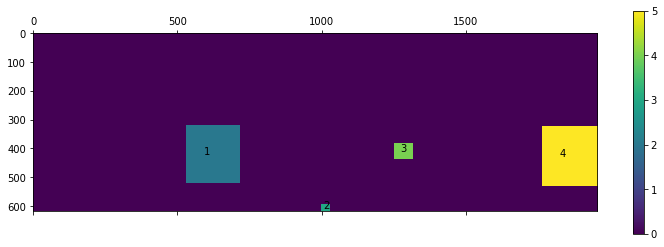

{1: ((530, 718, 321, 522), 27077),
 2: ((996, 1028, 595, 619), 825),
 3: ((1249, 1316, 383, 440), 2931),
 4: ((1761, 1956, 326, 532), 28440)}

In [2]:
imze = IMZMLExtract("/usr/local/hdd2/data/plaque_ims/211103_ATPe1_Peptides.imzML")
imze.list_regions()

In [3]:
spectra1_orig, spectra1_masses = imze.get_region_array_for_continuous_region(1, resolution=0.05)

Fetching region range
|##########################################################| 100% Time: 0:00:00
Fetching region spectra
|##########################################################| 100% Time: 0:03:21
Identifying mz-range
|##########################################################| 100% Time: 0:01:54
Identified mz-range: (499.9274052499517, 3300.2401386483893)
|##########################################################| 100% Time: 0:00:00
Identified region 1 as shape (189, 202, 56007)
Creating spectra
|##########################################################| 100% Time: 0:02:23
Forming region array from spectra
|##########################################################| 100% Time: 0:00:03
Finished region 1 with shape (189, 202, 56007) (0 padded pixels)


In [18]:
regionArray, regionMasses = spectra1_orig, spectra1_masses

normArray = imze.normalize_region_array(regionArray, normalize="tic")
normArray = imze.smooth_spectrum(spectrum=normArray, method="kaiser", window_length=100)

print("to called peaks")
spectra_peaks, spectra_peaks_mz = imze.to_peaks(normArray, regionMasses, resolution=0.1, min_peak_prominence=0.1)
print("to reduced peaks")
spectra_peaks_reduced, hv_indices = imze.to_reduced_peaks(spectra_peaks, topn=4000, bins=50, return_indices=True)

spectra_peaks_reduced_hvg = spectra_peaks_reduced[:, :, hv_indices]
spectra_peaks_mz_hvg = spectra_peaks_mz[hv_indices]

|##########################################################| 100% Time: 0:00:02


to called peaks
resolution: 0.1
minMZ: 499.90000000000003 499.9274052499517
maxMZ: 3300.3 3300.2274052505886
499.9274052499517 3300.2274052505886
499.90000000000003 3300.3
(189, 202, 28005)
(28005,)


background intensity: 0.8238981479406358 0.0 44.36677344918251


|##########################################################| 100% Time: 0:01:44


Identified peaks for 16069 of 28005 fields
Returning Peaks
to reduced peaks


|##########################################################| 100% Time: 0:03:22


Returning 154 highly-variable masses with z > 0.05695673078298569
(206, 206, 0.03174588, 0.05695673078298569, 0.07301922515034676, 0.10707766748964787, 1.5281928)
Identified 154 HV indices


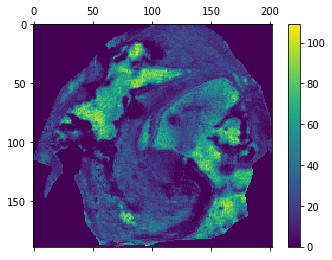

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
spec = SpectraRegion(spectra_peaks_reduced_hvg, spectra_peaks_mz_hvg)
spec.plot_tic()

In [20]:
kmod_clustering = ModifiedKMeansClusterer(region=spec)

Elem Matrix (38178, 154)


2022-03-30 23:34:18,392  ModifiedKMeansClusterer  INFO: Finished early, iteration 47.
2022-03-30 23:34:18,392  ModifiedKMeansClusterer  INFO: Finished early, iteration 47.
2022-03-30 23:34:18,392  ModifiedKMeansClusterer  INFO: Finished early, iteration 47.
2022-03-30 23:34:18,392  ModifiedKMeansClusterer  INFO: Finished early, iteration 47.
2022-03-30 23:34:18,392  ModifiedKMeansClusterer  INFO: Finished early, iteration 47.


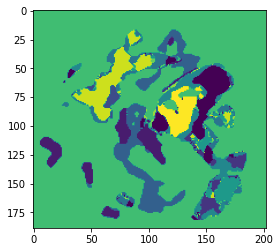

In [21]:
kmod_clustering.fit(num_target_clusters=15, distance='tibshirani')
plt.imshow(kmod_clustering.segmentation())

Elem Matrix (38178, 4000)


2022-03-30 14:24:54,408  ModifiedKMeansClusterer  INFO: Finished early, iteration 65.
2022-03-30 14:24:54,408  ModifiedKMeansClusterer  INFO: Finished early, iteration 65.


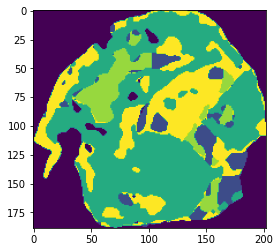

In [12]:
kmod_clustering.fit(num_target_clusters=15, distance='tibshirani')
plt.imshow(kmod_clustering.segmentation())

Elem Matrix (38178, 4000)


2022-03-23 10:52:30,623  ModifiedKMeansClusterer  INFO: Finished early, iteration 74.
2022-03-23 10:52:30,623  ModifiedKMeansClusterer  INFO: Finished early, iteration 74.
2022-03-23 10:52:30,623  ModifiedKMeansClusterer  INFO: Finished early, iteration 74.
2022-03-23 10:52:30,623  ModifiedKMeansClusterer  INFO: Finished early, iteration 74.


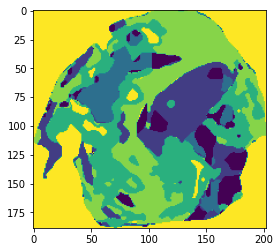

In [11]:
kmod_clustering.fit(num_target_clusters=15, distance='tibshirani')
plt.imshow(kmod_clustering.segmentation())

Elem Matrix (38178, 4000)


2022-03-23 12:29:39,463  ModifiedKMeansClusterer  INFO: Finished early, iteration 73.
2022-03-23 12:29:39,463  ModifiedKMeansClusterer  INFO: Finished early, iteration 73.
2022-03-23 12:29:39,463  ModifiedKMeansClusterer  INFO: Finished early, iteration 73.
2022-03-23 12:29:39,463  ModifiedKMeansClusterer  INFO: Finished early, iteration 73.


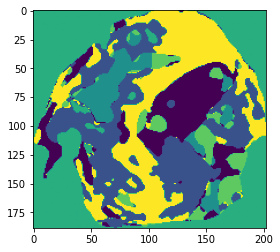

In [13]:
kmod_clustering.fit(num_target_clusters=10, distance='tibshirani')
plt.imshow(kmod_clustering.segmentation())

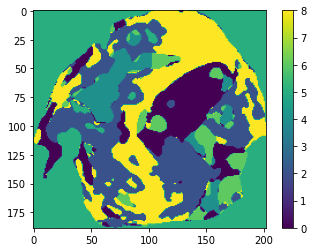

In [14]:
plt.imshow(kmod_clustering.segmentation())
plt.colorbar()

Elem Matrix (38178, 4000)


2022-03-23 12:42:01,354  ModifiedKMeansClusterer  INFO: Finished early, iteration 63.
2022-03-23 12:42:01,354  ModifiedKMeansClusterer  INFO: Finished early, iteration 63.
2022-03-23 12:42:01,354  ModifiedKMeansClusterer  INFO: Finished early, iteration 63.
2022-03-23 12:42:01,354  ModifiedKMeansClusterer  INFO: Finished early, iteration 63.


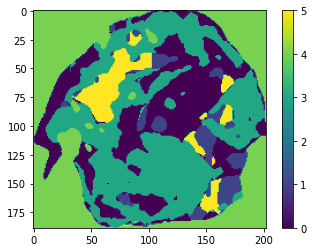

In [15]:
kmod_clustering.fit(num_target_clusters=6, distance='tibshirani')
plt.imshow(kmod_clustering.segmentation())
plt.colorbar()

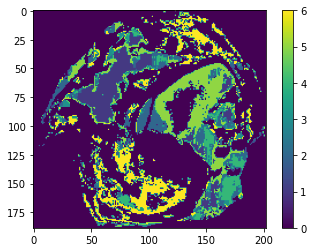

In [100]:
clustering = KMeansClusterer(spec)
clustering.fit(num_target_clusters=7)
plt.imshow(clustering.segmentation())
plt.colorbar()

In [41]:
pwfile = ProteinWeights(filename='/usr/local/hdd/rita/hiwi/Homo_sapiens/peptides5ppm.tsv')

2022-03-16 17:38:58,802  ProteinWeights  INFO: Added new Stream Handler
2022-03-16 17:38:58,802  ProteinWeights  INFO: Added new Stream Handler
2022-03-16 17:38:58,802  ProteinWeights  INFO: Added new Stream Handler
2022-03-16 17:38:58,802  ProteinWeights  INFO: Added new Stream Handler
2022-03-16 17:38:58,802  ProteinWeights  INFO: Added new Stream Handler
2022-03-16 17:39:17,725  ProteinWeights  INFO: Loaded a total of 19271 proteins with 452006 masses
2022-03-16 17:39:17,725  ProteinWeights  INFO: Loaded a total of 19271 proteins with 452006 masses
2022-03-16 17:39:17,725  ProteinWeights  INFO: Loaded a total of 19271 proteins with 452006 masses
2022-03-16 17:39:17,725  ProteinWeights  INFO: Loaded a total of 19271 proteins with 452006 masses
2022-03-16 17:39:17,725  ProteinWeights  INFO: Loaded a total of 19271 proteins with 452006 masses


In [17]:
spec.segmented = clustering.segmentation()

In [19]:
de_df = spec.find_all_markers(pwfile, use_methods=['ttest'])

2022-03-16 11:28:28,121  SpectraRegion  INFO: DE data for case: [0]
2022-03-16 11:28:28,122  SpectraRegion  INFO: DE data for control: [6, 2, 5, 4, 3, 1]
2022-03-16 11:28:28,123  SpectraRegion  INFO: Running [0] against [6, 2, 5, 4, 3, 1]
2022-03-16 11:28:28,124  SpectraRegion  INFO: DE result key: ((0,), (1, 2, 3, 4, 5, 6))
2022-03-16 11:28:28,124  SpectraRegion  INFO: DE result key already exists
2022-03-16 11:28:28,128  SpectraRegion  INFO: DE result for case ((0,), (1, 2, 3, 4, 5, 6)) with (4000, 7) results
2022-03-16 11:28:28,129  SpectraRegion  INFO: DF column names ['gene', 'pval', 'qval', 'log2fc', 'mean', 'zero_mean', 'zero_variance']
2022-03-16 11:28:28,130  SpectraRegion  INFO: DE result logFC inversed
2022-03-16 11:28:28,134  SpectraRegion  INFO: DE result for case ((0,), (1, 2, 3, 4, 5, 6)) with (2929, 7) results (filtered)
2022-03-16 11:28:29,534  SpectraRegion  INFO: Created matrices with shape (26300, 4000) and (11878, 4000) (target, bg)
2022-03-16 11:32:00,493  Spectra

In [29]:
de_df['ttest']

,clusterID,gene_ident,gene_mass,gene,protein_mass,avg_logFC,qvalue,num,anum,mean,median,num_bg,anum_bg,mean_bg,median_bg
0,0,mass_628_1,628.1,TSNAXIP1,628.270420,-3.894859,0.000000e+00,26300,4830,0.808426,0.0,11878,8294,12.025676,9.178302
1,0,mass_628_1,628.1,KDM2B,628.275127,-3.894859,0.000000e+00,26300,4830,0.808426,0.0,11878,8294,12.025676,9.178302
2,0,mass_628_1,628.1,CLEC4E,628.285675,-3.894859,0.000000e+00,26300,4830,0.808426,0.0,11878,8294,12.025676,9.178302
3,0,mass_628_1,628.1,CARD6,628.289047,-3.894859,0.000000e+00,26300,4830,0.808426,0.0,11878,8294,12.025676,9.178302
4,0,mass_628_1,628.1,DOCK8,628.292886,-3.894859,0.000000e+00,26300,4830,0.808426,0.0,11878,8294,12.025676,9.178302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224148,1,mass_3102_6000000000004,3102.6,OR10K1,3105.578161,-0.814011,6.851031e-27,1957,218,0.094992,0.0,36221,6355,0.167005,0.000000
224149,1,mass_3102_6000000000004,3102.6,CREB3,3105.580010,-0.814011,6.851031e-27,1957,218,0.094992,0.0,36221,6355,0.167005,0.000000
224150,1,mass_3102_6000000000004,3102.6,DDOST,3105.587003,-0.814011,6.851031e-27,1957,218,0.094992,0.0,36221,6355,0.167005,0.000000
224151,1,mass_3102_6000000000004,3102.6,CDH5,3099.606955,-0.814011,6.851031e-27,1957,218,0.094992,0.0,36221,6355,0.167005,0.000000


In [31]:
#de_df['ttest'].to_csv('found_markers_aorta_peptides.tsv', sep='\t', index=False)

In [32]:
work_df = de_df['ttest']

In [54]:
unique_mass = np.unique(work_df['protein_mass'])
unique_mass_dict = defaultdict()
print(len(unique_mass))
for u in unique_mass:
    if len(list(unique_mass_dict.keys()))%10000==0:
        print(len(list(unique_mass_dict.keys())))
    unique_mass_dict[u] = pwfile.get_protein_from_mz(u, ppm=5)

149880
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000


In [57]:
mini_unique_mass_dict = defaultdict()
for m in unique_mass_dict:
    mini_unique_mass_dict[m] = [x[0] for x in unique_mass_dict[m]]

In [64]:
len_unique_mass_dict = defaultdict()
for m in unique_mass_dict:
    len_unique_mass_dict[m] = len([x[0] for x in unique_mass_dict[m]])

In [65]:
work_df['matches'] = work_df['protein_mass'].map(mini_unique_mass_dict)
work_df['#matches'] = work_df['protein_mass'].map(len_unique_mass_dict)

Text(0, 0.5, 'frequency')

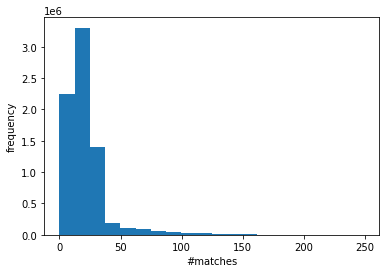

In [72]:
all_matches = list(work_df['#matches'])
plt.hist(all_matches, bins=20)
plt.xlabel('#matches')
plt.ylabel('frequency')

In [67]:
work_df.sort_values('#matches')

,clusterID,gene_ident,gene_mass,gene,protein_mass,avg_logFC,qvalue,num,anum,mean,median,num_bg,anum_bg,mean_bg,median_bg,matches,#matches
438809,4,mass_2770_6000000000004,2770.6,LRRK2,2771.574490,-0.690075,4.725593e-09,868,97,0.096925,0.000000,37310,6121,0.156375,0.0,[],0
171246,6,mass_1913_1000000000001,1913.1,GAS6,1914.702985,1.107754,4.025953e-92,3488,1121,0.377723,0.000000,34690,5533,0.175269,0.0,[],0
212001,4,mass_2578_7000000000003,2578.7,NPSR1,2576.538589,-0.558205,3.221895e-08,868,138,0.138844,0.000000,37310,7864,0.204439,0.0,[],0
212002,4,mass_2578_7000000000003,2578.7,CHRNB3,2576.538589,-0.558205,3.221895e-08,868,138,0.138844,0.000000,37310,7864,0.204439,0.0,[],0
1896555,6,mass_2510_1,2510.1,NPAS3,2510.871733,0.575462,2.351120e-27,3488,896,0.252525,0.000000,34690,5927,0.169462,0.0,[],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22263,1,mass_690_8000000000001,690.8,KRT222,688.386787,1.446399,6.078747e-166,1957,1116,3.475336,4.659225,36221,12440,1.275230,0.0,"[NUP98, SPTAN1, TCF7, HARS2, PLEKHO1, NKX2-5, ...",249
22264,1,mass_690_8000000000001,690.8,ZNF691,688.386787,1.446399,6.078747e-166,1957,1116,3.475336,4.659225,36221,12440,1.275230,0.0,"[NUP98, SPTAN1, TCF7, HARS2, PLEKHO1, NKX2-5, ...",249
22265,1,mass_690_8000000000001,690.8,HSP90AB1,688.386787,1.446399,6.078747e-166,1957,1116,3.475336,4.659225,36221,12440,1.275230,0.0,"[NUP98, SPTAN1, TCF7, HARS2, PLEKHO1, NKX2-5, ...",249
22323,1,mass_690_8000000000001,690.8,FCSK,688.386785,1.446399,6.078747e-166,1957,1116,3.475336,4.659225,36221,12440,1.275230,0.0,"[NUP98, SPTAN1, TCF7, HARS2, PLEKHO1, NKX2-5, ...",249


In [70]:
len(np.unique(work_df[work_df['#matches']==0]['protein_mass']))

2529

In [73]:
#work_df.to_csv('found_markers_backwards_aorta_peptides.tsv', sep='\t', index=False)

In [16]:
work_df = pd.read_csv('found_markers_backwards_aorta_peptides.tsv', sep='\t')

In [17]:
prot_masses = [pwfile.get_protein_from_mz(m, ppm=5) for m in spectra_peaks_mz_hvg]

In [18]:
prot_masses_one_match = [x[0][0] for x in prot_masses if len(x)==1]

In [19]:
len(prot_masses_one_match)

400

In [36]:
#work_df[work_df['#matches']==1].to_csv('found_one_match_backwards_aorta_peptides.tsv', sep='\t', index=False)

In [27]:
tmp = work_df[work_df['gene'].isin(prot_masses_one_match)]
tmp

,clusterID,gene_ident,gene_mass,gene,protein_mass,avg_logFC,qvalue,num,anum,mean,median,num_bg,anum_bg,mean_bg,median_bg,matches,#matches
7,0,mass_628_1,628.1,FASN,628.292886,-3.894859,0.000000e+00,26300,4830,0.808426,0.0,11878,8294,12.025676,9.178302,"['FCAR', 'BTBD7', 'ZNF20', 'ZNF846', 'AFF3']",5
53,0,mass_628_1,628.1,PTPRZ1,628.340505,-3.894859,0.000000e+00,26300,4830,0.808426,0.0,11878,8294,12.025676,9.178302,"['C17orf113', 'TTN', 'TRIM56']",3
67,0,mass_628_1,628.1,DNAJC14,628.354424,-3.894859,0.000000e+00,26300,4830,0.808426,0.0,11878,8294,12.025676,9.178302,"['THEG', 'PARP3', 'LRRC42', 'PDE6B', 'NCAPH2',...",24
104,0,mass_628_1,628.1,TARBP1,628.365655,-3.894859,0.000000e+00,26300,4830,0.808426,0.0,11878,8294,12.025676,9.178302,"['EIF4EBP1', 'GDF5', 'DCTN1', 'FAM210A', 'CTRB...",26
142,0,mass_628_1,628.1,TTN,628.365657,-3.894859,0.000000e+00,26300,4830,0.808426,0.0,11878,8294,12.025676,9.178302,"['EIF4EBP1', 'GDF5', 'DCTN1', 'FAM210A', 'CTRB...",26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7526528,1,mass_3102_6000000000004,3102.6,LILRA1,3104.552869,-0.814011,6.851031e-27,1957,218,0.094992,0.0,36221,6355,0.167005,0.000000,"['EHBP1L1', 'ZDHHC9', 'HIPK4', 'TREML1', 'SH2D...",10
7526596,1,mass_3102_6000000000004,3102.6,IGFN1,3100.396206,-0.814011,6.851031e-27,1957,218,0.094992,0.0,36221,6355,0.167005,0.000000,"['CLTCL1', 'SGO2', 'PGAP2', 'KDM4C', 'SPDYE6',...",8
7526603,1,mass_3102_6000000000004,3102.6,ZNF423,3100.248459,-0.814011,6.851031e-27,1957,218,0.094992,0.0,36221,6355,0.167005,0.000000,[],0
7526605,1,mass_3102_6000000000004,3102.6,VIPR2,3100.186235,-0.814011,6.851031e-27,1957,218,0.094992,0.0,36221,6355,0.167005,0.000000,[],0


In [31]:
tmp[(tmp['#matches']==0) & (tmp['clusterID']==0)].sort_values('protein_mass')

,clusterID,gene_ident,gene_mass,gene,protein_mass,avg_logFC,qvalue,num,anum,mean,median,num_bg,anum_bg,mean_bg,median_bg,matches,#matches
1451,0,mass_628_1,628.1,COL9A3,625.293220,-3.894859,0.000000e+00,26300,4830,0.808426,0.0,11878,8294,12.025676,9.178302,[],0
1429,0,mass_628_1,628.1,CNPY4,625.318373,-3.894859,0.000000e+00,26300,4830,0.808426,0.0,11878,8294,12.025676,9.178302,[],0
1305,0,mass_628_1,628.1,GSC2,625.416297,-3.894859,0.000000e+00,26300,4830,0.808426,0.0,11878,8294,12.025676,9.178302,[],0
269,0,mass_628_1,628.1,FRAS1,627.395561,-3.894859,0.000000e+00,26300,4830,0.808426,0.0,11878,8294,12.025676,9.178302,[],0
273,0,mass_628_1,628.1,STRIP1,627.395561,-3.894859,0.000000e+00,26300,4830,0.808426,0.0,11878,8294,12.025676,9.178302,[],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218179,0,mass_2614_3,2614.3,WASHC2A,2615.975181,-0.506713,6.254404e-48,26300,3826,0.142089,0.0,11878,2633,0.201882,0.000000,[],0
2218726,0,mass_2706_3,2706.3,RNF217,2704.658050,-0.531301,8.613537e-50,26300,3653,0.136501,0.0,11878,2545,0.197275,0.000000,[],0
2218723,0,mass_2706_3,2706.3,TTN,2705.045294,-0.531301,8.613537e-50,26300,3653,0.136501,0.0,11878,2545,0.197275,0.000000,[],0
2218724,0,mass_2706_3,2706.3,TMEM97,2707.615459,-0.531301,8.613537e-50,26300,3653,0.136501,0.0,11878,2545,0.197275,0.000000,[],0


In [34]:
tmp[tmp['#matches']==0].groupby(['clusterID'])['protein_mass'].nunique()

clusterID
0    293
1    112
2    132
3    330
4    219
5    330
6    340
Name: protein_mass, dtype: int64